<a href="https://colab.research.google.com/github/stuartketcham/DA310---Multiple-Linear-Regression---Group-Project/blob/main/DA310_Multiple_Linear_Regression_Group_Project_insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
from sklearn.compose import make_column_selector as selector

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Plan**

Load data

Split dataset into training and test dataset, use training dataset to create the model.

Display sample data and summary


Calculate normality p-value

Calculate lineral regression model and display values

Display regression summary

Display scatterplot again with calculated regression line

Compare actual and predicted values to determine accuracy of the linear regression equation

Observe residuals data in graphical form to draw conclusions


Normality in Mulitiple Linear Regression
https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/normality/


In [2]:
#Read this csv file from GitHub into Jupyter Notebook.
dataset = pd.read_csv(r"https://raw.githubusercontent.com/stuartketcham/DA310---Multiple-Linear-Regression---Group-Project/main/insurance.csv")

In [20]:
#Mask category values to numeric/binary
dataset['sex'].mask(dataset['sex'] == 'female', 0, inplace=True)
dataset['sex'].mask(dataset['sex'] == 'male', 1, inplace=True)

dataset['smoker'].mask(dataset['smoker'] == 'no', 0, inplace=True)
dataset['smoker'].mask(dataset['smoker'] == 'yes', 1, inplace=True)

dataset['region'].mask(dataset['region'] == 'northeast', 0, inplace=True)
dataset['region'].mask(dataset['region'] == 'southeast', 1, inplace=True)
dataset['region'].mask(dataset['region'] == 'northwest', 2, inplace=True)
dataset['region'].mask(dataset['region'] == 'southwest', 3, inplace=True)

In [21]:
#Make a copy and populate with training data
datasettraining = dataset.copy()
datasettest = dataset.copy()

#Take a random sample of 75% of the data for training (and put them into order and renumber to eliminate missing index values)
datasettraining = datasettraining.sample(frac = .75).sort_index().reset_index(drop=True)

#Get remaining 25% of data rows from dataset (remove all rows from dataset that aren't already in datasettraining)
datasettest = (pd.merge(dataset, datasettraining, indicator=True, how='outer').query('_merge=="left_only"').drop('_merge', axis=1)).sort_index().reset_index(drop=True)

In [22]:
#Check training data head
datasettraining.head()

,age,sex,bmi,children,smoker,region,charges
0,28,1,33.000,3,0,1,4449.46200
1,33,1,22.705,0,0,2,21984.47061
2,32,1,28.880,0,0,2,3866.85520
3,31,0,25.740,0,0,1,3756.62160
4,46,0,33.440,1,0,1,8240.58960


In [23]:
#Summary of all fields
datasettraining.describe()

,age,bmi,children,charges
count,1004.000000,1004.000000,1004.000000,1004.000000
mean,39.250996,30.614522,1.110558,13326.397135
std,14.208627,6.016600,1.219126,12244.623522
min,18.000000,16.815000,0.000000,1131.506600
25%,26.000000,26.400000,0.000000,4710.601913
50%,39.000000,30.302500,1.000000,9285.794350
75%,51.250000,34.407500,2.000000,16452.097988
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
#Summary of all fields
datasettest.describe()

,age,bmi,children,charges
count,333.000000,333.000000,333.000000,333.000000
mean,39.432432,30.816066,1.078078,13586.377138
std,13.617155,6.426439,1.171923,12122.607905
min,18.000000,17.290000,0.000000,1121.873900
25%,28.000000,26.125000,0.000000,5267.818150
50%,40.000000,30.250000,1.000000,9715.841000
75%,51.000000,35.800000,2.000000,17043.341400
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
#Set Variable Choices
MultiVarChoices = ['age', 'sex', 'bmi', 'children', 'smoker', 'region']

residuals_columns_selector = selector(dtype_exclude=object)
residuals_columns = residuals_columns_selector(dataset[MultiVarChoices])

response = 'charges'

#Create Linear Regression object
model = LinearRegression()

#Fit the dataset
model.fit(datasettraining[MultiVarChoices], datasettraining[response])


LinearRegression()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  if __name__ == '__main__':


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc732821cd0>,
      dtype=object)

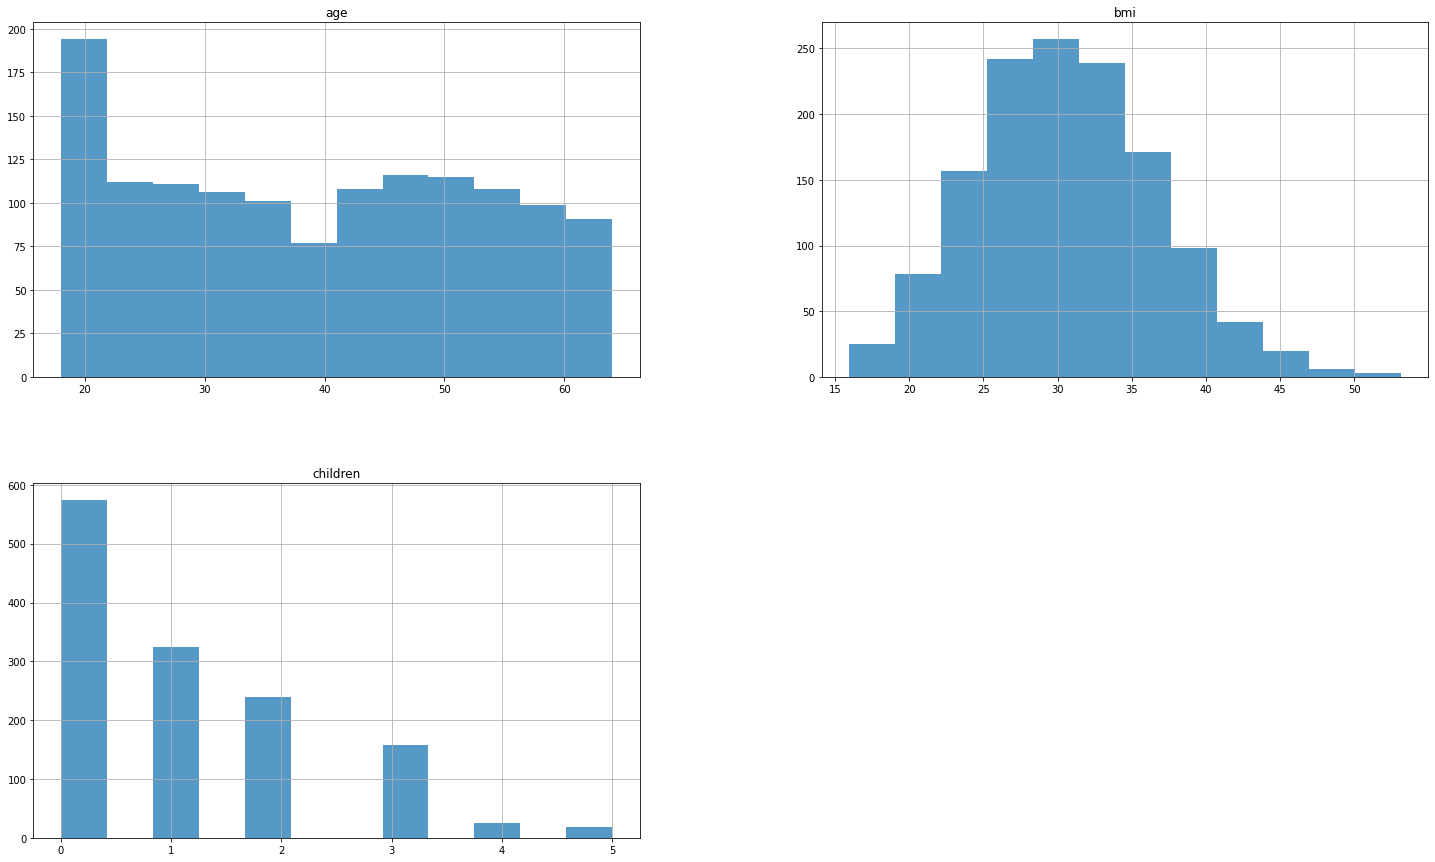

In [9]:
#getonly fields included in model
plots = dataset[MultiVarChoices]

#Display histograms for fields in model
#Set size of histogram
f, ax = plt.subplots(1, 1, figsize = (25, 15))

#Display histogram
plots.hist(bins=12, alpha=0.75, ax=ax)

In [10]:
#Gernate list of predictions from test data
predictions = model.predict(datasettest[MultiVarChoices])  

#Check test data head
datasettest.head() 

,age,sex,bmi,children,smoker,region,charges
0,18,1,33.770,1,0,1,1725.55230
1,33,1,22.705,0,0,2,21984.47061
2,23,1,34.400,0,0,3,1826.84300
3,19,1,24.600,1,0,3,1837.23700
4,59,0,27.720,3,0,1,14001.13380


In [11]:
#Sample data output
print('Actual'.ljust(14), 'Predicted'.ljust(14))
print(response.ljust(14), response.ljust(14))

for i in [0,1,2,3,4,95,96,97,98,99]:
    print(str(datasettest[response][i]).ljust(14), str(predictions[i]).ljust(14))

Actual         Predicted     
charges        charges       
1725.5523      3962.7284509670553
21984.47061    3795.611511844565
1826.843       4413.451064694464
1837.237       809.3760375541005
14001.1338     13750.994904522546
6184.2994      7601.272862652118
14133.03775    4770.733534094154
24603.04837    8426.126234582442
1607.5101      -574.0908658887565
4751.07        6849.3904192809805


In [12]:
#Check accuracy of model (Coefficient of Determination)
r_sq = model.score(datasettraining[MultiVarChoices], datasettraining[response])
print('Coefficient of Determination:', r_sq)

Coefficient of Determination: 0.75192485343566


In [13]:
#Get the Y-intercept value
salIntercept = model.intercept_

#Get the Coefficents for the formula.
salCoef = model.coef_

#Output formula variables for regression analysis.
print('Intercept:', salIntercept,'\n')

print("Coefficients:")
list(zip(datasettraining[MultiVarChoices], salCoef))

Intercept: -11386.0759977396 

Coefficients:


[('age', 264.8134204420526),
 ('sex', 120.22843629253504),
 ('bmi', 305.5931618057695),
 ('children', 449.9916403243882),
 ('smoker', 23859.14436633281),
 ('region', -307.93827004805064)]

In [14]:
#Assemble fields for model
mmfields = response + ' ~ ' + ' + '.join(MultiVarChoices)

# fit multi linear regression model
multi_model = ols(mmfields, data=datasettraining).fit()

# display model summary
print(multi_model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     378.6
Date:                Sat, 18 Jun 2022   Prob (F-statistic):          1.11e-295
Time:                        18:01:39   Log-Likelihood:                -10162.
No. Observations:                1004   AIC:                         2.034e+04
Df Residuals:                     995   BIC:                         2.039e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -1.17e+04   1133.193    -10.321      

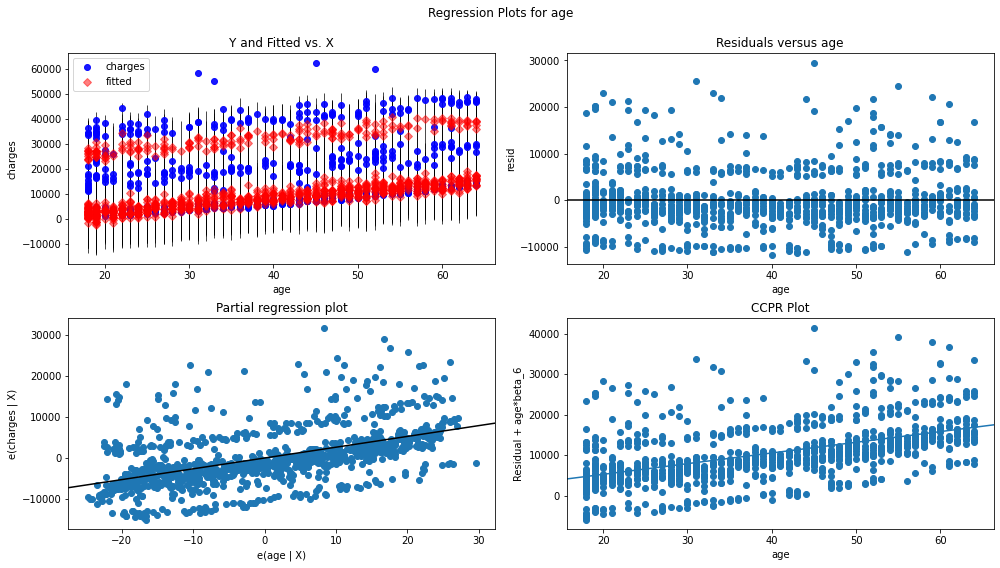

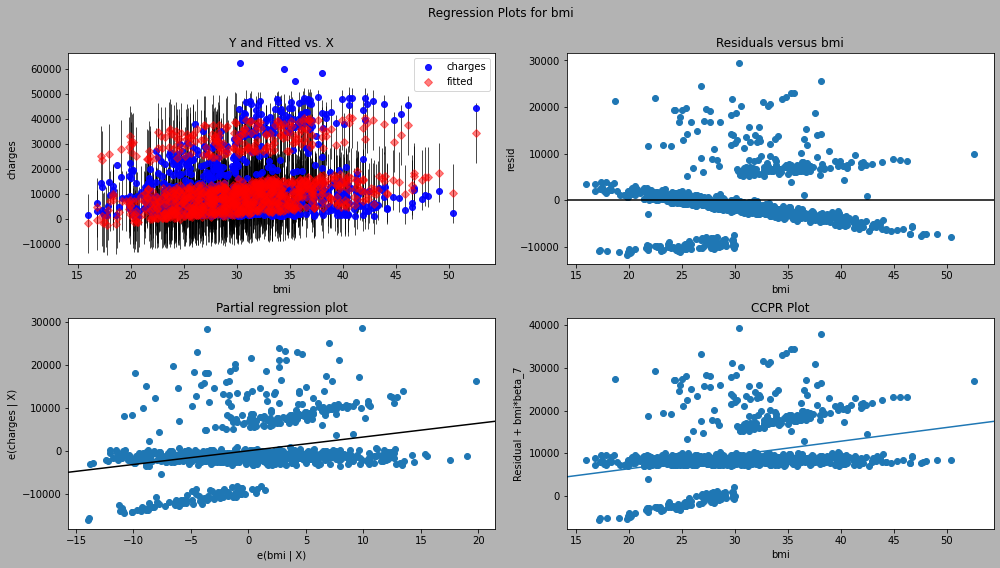

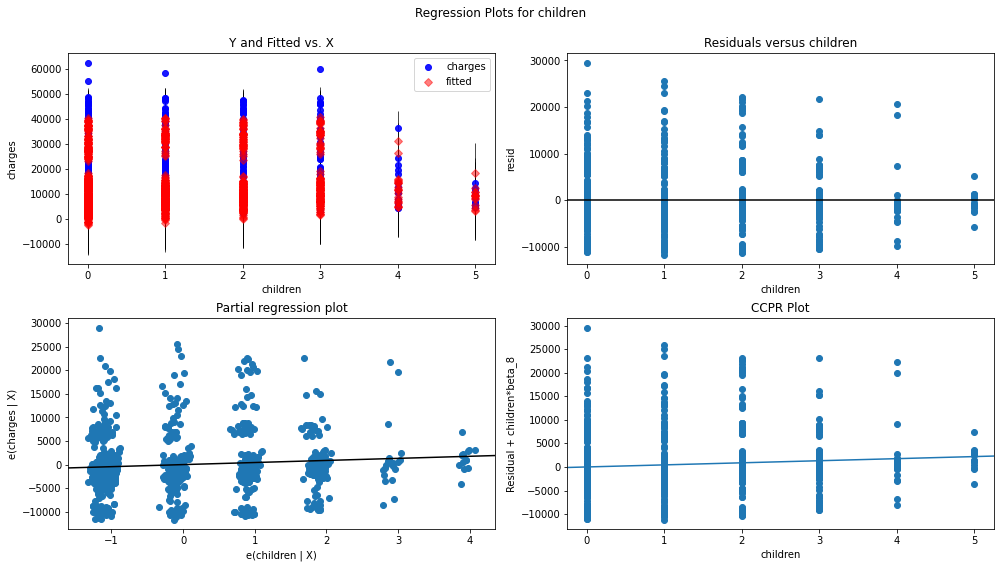

In [15]:
#Set background color
facecolor = '0.7'
for i in range(0,len(residuals_columns)):
  #Alternate background color so it's easier to see separate graphs for the different residuals
  if (facecolor == '0.7'):
    facecolor = '1'
  else:
    facecolor = '0.7'
  #Fresh figure so graphs don't all stack together
  fig = None
  # modify figure size
  fig = plt.figure(figsize=(14, 8))
  fig.patch.set_facecolor(facecolor)
  #Creating regression plots
  fig = sm.graphics.plot_regress_exog(multi_model, residuals_columns[i],fig=fig)
  fig.show()

# **Conclusions**
Observing our residuals, the points in the BMI scatterplot are appearing in clusters, meaning linear regression may not an appropriate model to predict our data.